In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning


In [56]:
df = pd.read_csv('./dataset/fraudTrain.csv')

In [57]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [58]:
df.shape

(1296675, 23)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [60]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [61]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# EDA

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud'>

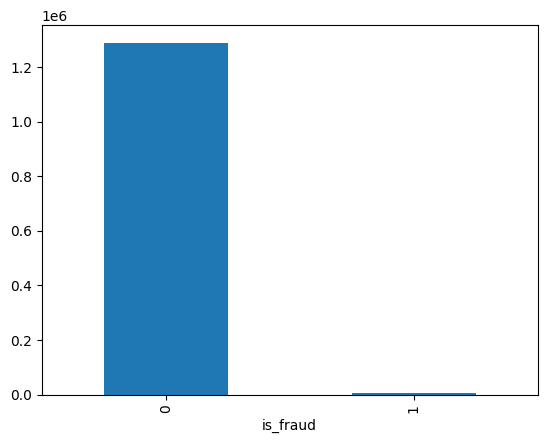

In [63]:
df.groupby('is_fraud').count()['cc_num'].plot.bar()

In [64]:
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]

print(len(fraud), len(non_fraud))

7506 1289169


In [65]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

<Axes: >

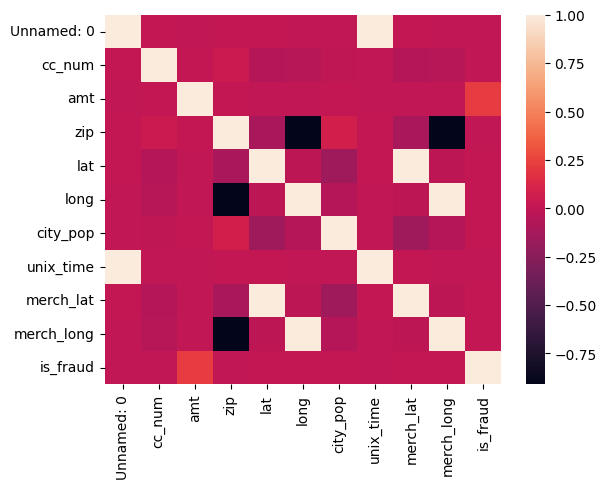

In [66]:
sns.heatmap(df[[i for i in df.columns\
                         if df[i].dtype == 'int64' \
                            or df[i].dtype == 'float64']]\
                            .corr())

# Data Preparation

In [67]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])

In [68]:
df_balanced.shape


(15012, 23)

<Axes: xlabel='is_fraud'>

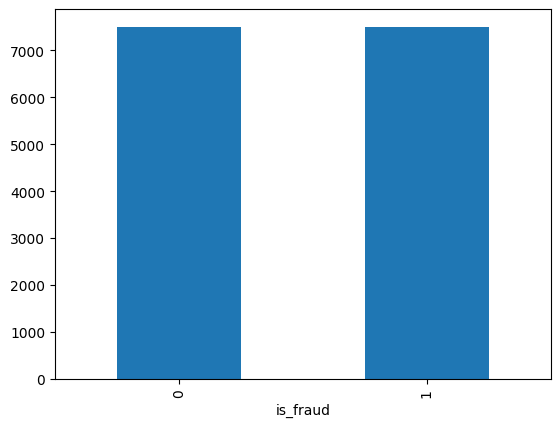

In [69]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()


## Dropping Columns

In [70]:
columns_dropped = ['Unnamed: 0',
                   'merchant', 
                   'cc_num',
                   'first', 
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [71]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  15012 non-null  object 
 1   category               15012 non-null  object 
 2   amt                    15012 non-null  float64
 3   city                   15012 non-null  object 
 4   state                  15012 non-null  object 
 5   lat                    15012 non-null  float64
 6   long                   15012 non-null  float64
 7   city_pop               15012 non-null  int64  
 8   dob                    15012 non-null  object 
 9   is_fraud               15012 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


## Feature Engineering

In [72]:
# Calculating Age 

df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])


In [73]:
df_balanced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  15012 non-null  object        
 1   category               15012 non-null  object        
 2   amt                    15012 non-null  float64       
 3   city                   15012 non-null  object        
 4   state                  15012 non-null  object        
 5   lat                    15012 non-null  float64       
 6   long                   15012 non-null  float64       
 7   city_pop               15012 non-null  int64         
 8   dob                    15012 non-null  datetime64[ns]
 9   is_fraud               15012 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [74]:
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})

In [75]:
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']

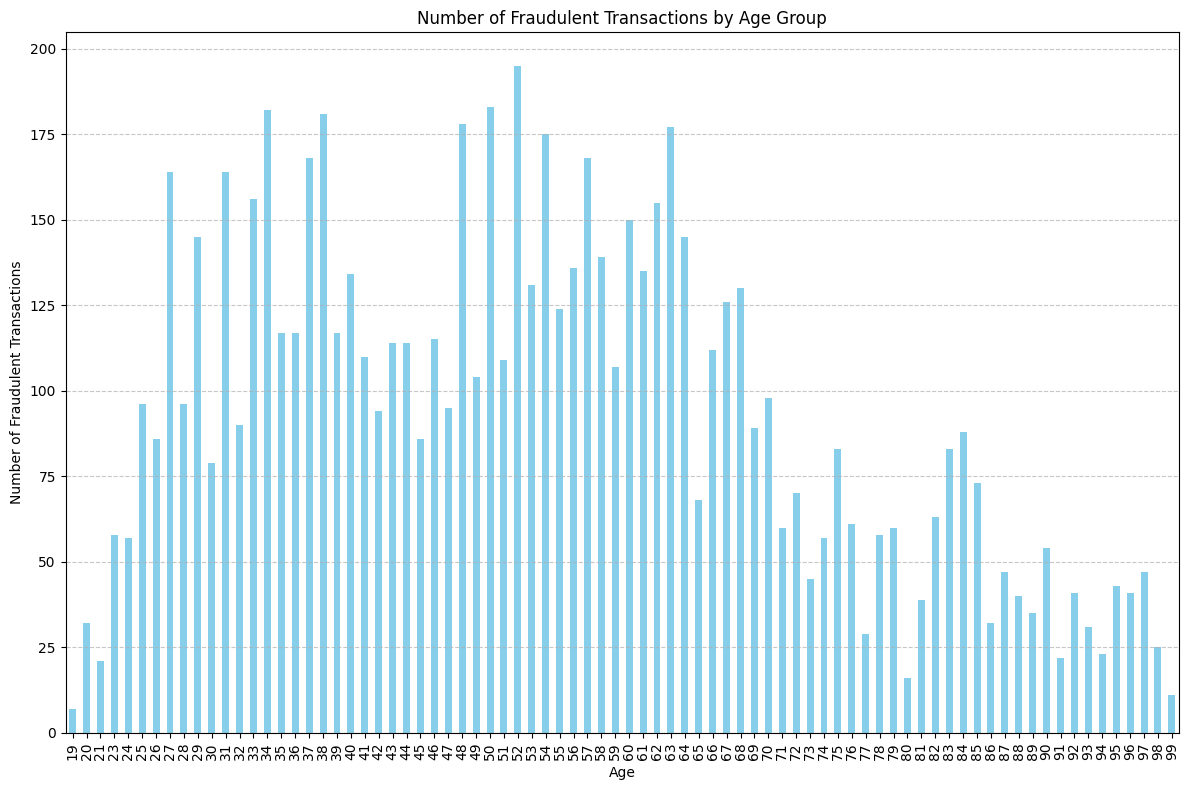

In [76]:
# Analyzing how many frauds occur for each age group

# Group by 'age' and count the number of frauds
fraud_by_age = df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

# Plotting the data
plt.figure(figsize=(12, 8))
fraud_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Age Group')
plt.xticks(rotation=90)  # Rotate labels by 90 degrees for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Label Encoding

In [77]:
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [78]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [79]:
CATEGORICAL_FEATURES

['trans_date_trans_time', 'category', 'city', 'state']

In [80]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

## Correcting Datatypes

In [81]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')


## Scaling Dataset

<Axes: >

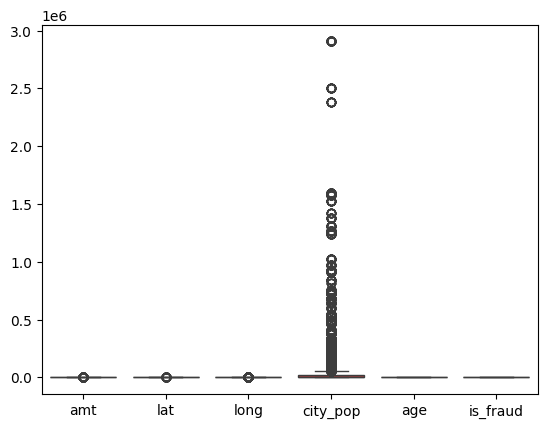

In [82]:
sns.boxplot(df_balanced[NUMERICAL_FEATURES])


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [84]:
last_column = df_scaled.shape[1]-1


In [85]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 7506
Fraud: 7506


In [86]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000866,0.307692,0.044200,0.185811,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,0.000933,0.153846,0.001660,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,0.001000,0.307692,0.043450,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,0.001066,0.153846,0.000952,0.185811,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,0.001133,0.307692,0.043358,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [87]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,0.000866,0.307692,0.044200,0.185811,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,0.000933,0.153846,0.001660,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,0.001000,0.307692,0.043450,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,0.001066,0.153846,0.000952,0.185811,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,0.001133,0.307692,0.043358,0.811937,0.86,0.201707,0.687801,0.549003,0.555556,1.0


# Making Models

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)


In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X = df_scaled.drop(columns = 'is_fraud')
y = df_scaled['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (12009, 9)
Size of y_train:  (12009,)
Size of x_test:  (3003, 9)
Size of y_test:  (3003,)


In [101]:
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

## Logistic Regression


 Accuracy: 0.8471528471528471
 Precision: 0.960456942003515
 Recall: 0.7252820172528202
 F1 Score: 0.8264650283553875


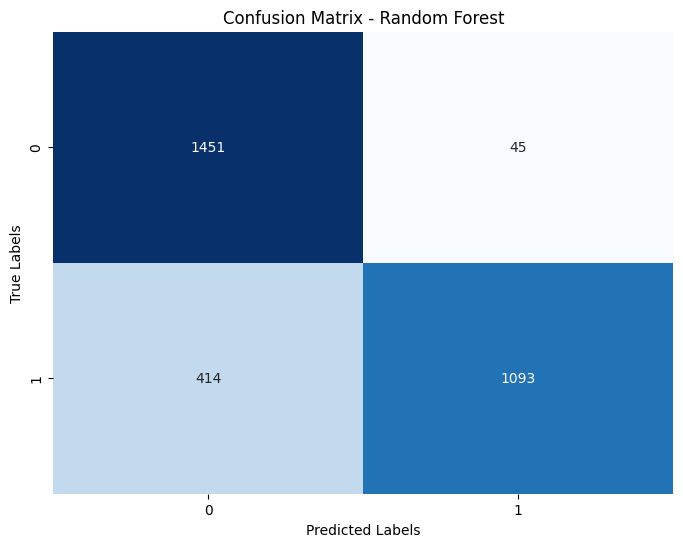


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86      1496
         1.0       0.96      0.73      0.83      1507

    accuracy                           0.85      3003
   macro avg       0.87      0.85      0.84      3003
weighted avg       0.87      0.85      0.84      3003



C:\Users\priya\AppData\Local\Temp\ipykernel_51140\1218337835.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([logistic_regression_results])], ignore_index=True)


In [103]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)
y_pred = modelLR.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

logistic_regression_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([logistic_regression_results])], ignore_index=True)


## Decision Tree




 Accuracy: 0.951048951048951
 Precision: 0.9539385847797063
 Recall: 0.9482415394824154
 F1 Score: 0.95108153078203


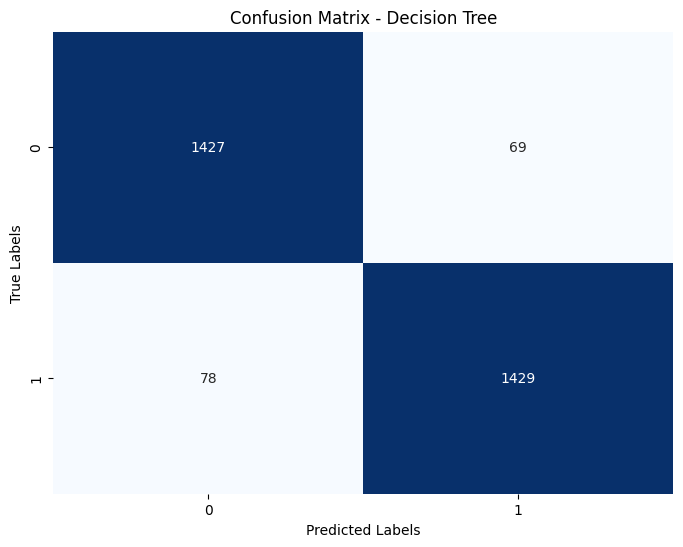


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1496
         1.0       0.95      0.95      0.95      1507

    accuracy                           0.95      3003
   macro avg       0.95      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003



In [104]:
modelDT = DecisionTreeClassifier()
modelDT.fit(x_train, y_train)
y_pred = modelDT.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

decision_tree_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([decision_tree_results])], ignore_index=True)

## Random Forest



 Accuracy: 0.9583749583749583
 Precision: 0.970708446866485
 Recall: 0.9455872594558726
 F1 Score: 0.957983193277311


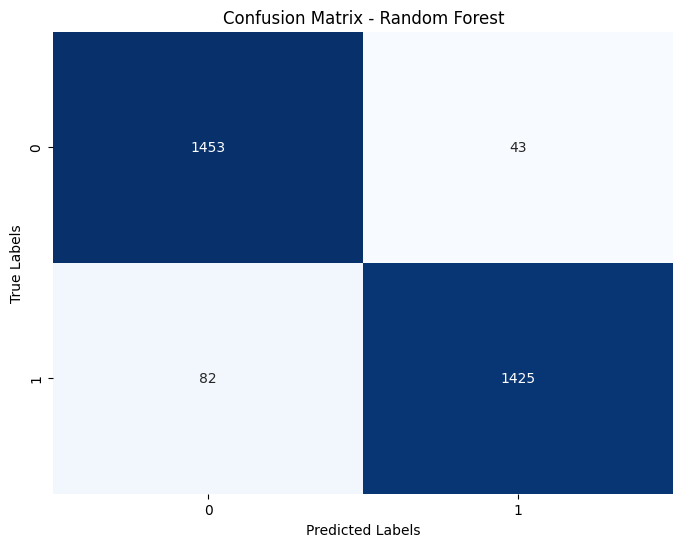


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1496
         1.0       0.97      0.95      0.96      1507

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003



In [105]:
modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

random_forest_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([random_forest_results])], ignore_index=True)

## Gradient Boosting (XGBoost)


 Accuracy: 0.967032967032967
 Precision: 0.9674634794156707
 Recall: 0.966821499668215
 F1 Score: 0.9671423830069698


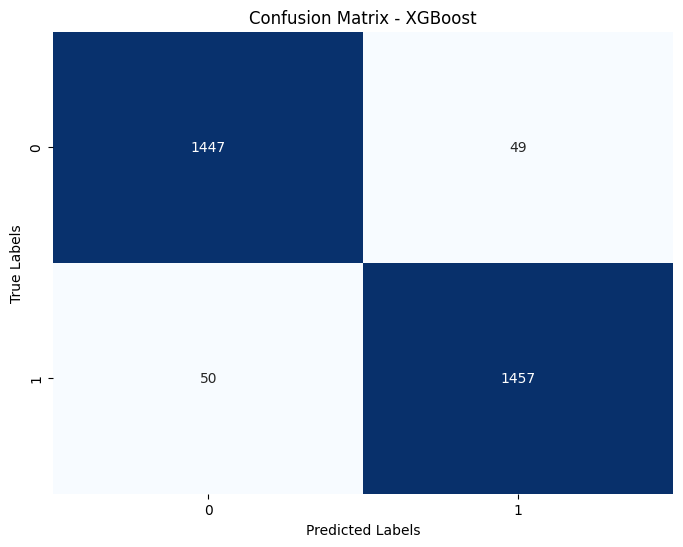


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1496
         1.0       0.97      0.97      0.97      1507

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003



In [106]:
modelXGB = XGBClassifier()
modelXGB.fit(x_train, y_train)
y_pred = modelXGB.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

xgboost_results = {
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([xgboost_results])], ignore_index=True)

## Support Vector Machine (SVM)


 Accuracy: 0.8528138528138528
 Precision: 0.9562982005141388
 Recall: 0.7405441274054413
 F1 Score: 0.8347045624532535


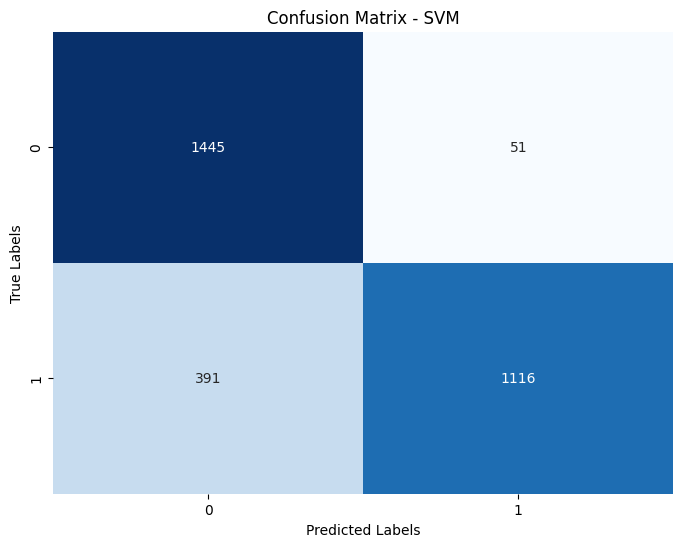


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      1496
         1.0       0.96      0.74      0.83      1507

    accuracy                           0.85      3003
   macro avg       0.87      0.85      0.85      3003
weighted avg       0.87      0.85      0.85      3003



In [107]:
modelSVM = SVC()
modelSVM.fit(x_train, y_train)
y_pred = modelSVM.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

svm_results = {
    "Model": "Support Vector Machine",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([svm_results])], ignore_index=True)

## K-Nearest Neighbors (KNN)


 Accuracy: 0.7622377622377622
 Precision: 0.7389993972272453
 Recall: 0.8135368281353683
 F1 Score: 0.7744788376500316


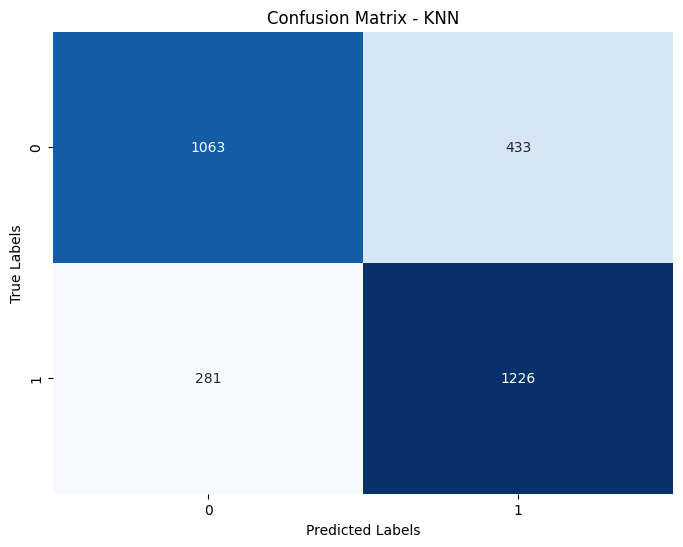


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      1496
         1.0       0.74      0.81      0.77      1507

    accuracy                           0.76      3003
   macro avg       0.76      0.76      0.76      3003
weighted avg       0.76      0.76      0.76      3003



In [108]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(x_train, y_train)
y_pred = modelKNN.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

knn_results = {
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([knn_results])], ignore_index=True)

## Neural Networks (MLPClassifier)


 Accuracy: 0.8504828504828504
 Precision: 0.9467905405405406
 Recall: 0.7438619774386198
 F1 Score: 0.8331475287997027


c:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


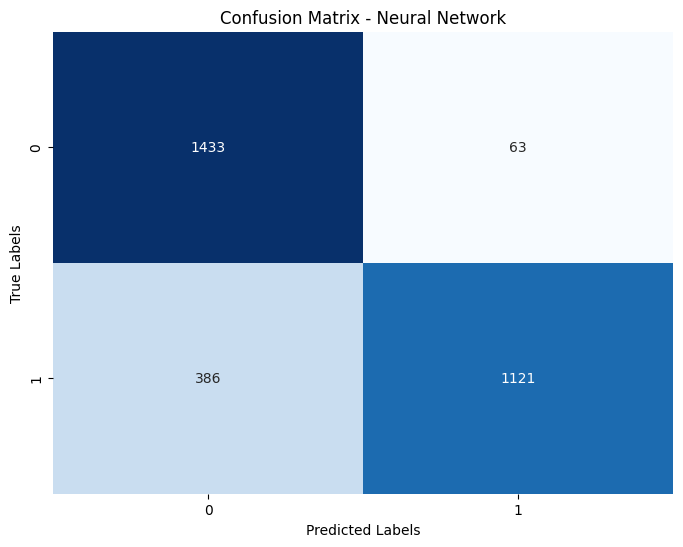


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86      1496
         1.0       0.95      0.74      0.83      1507

    accuracy                           0.85      3003
   macro avg       0.87      0.85      0.85      3003
weighted avg       0.87      0.85      0.85      3003



In [109]:
modelNN = MLPClassifier()
modelNN.fit(x_train, y_train)
y_pred = modelNN.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

neural_network_results = {
    "Model": "Neural Networks",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([neural_network_results])], ignore_index=True)


## Naive Bayes


 Accuracy: 0.7805527805527805
 Precision: 0.9463157894736842
 Recall: 0.5965494359654944
 F1 Score: 0.7317867317867318


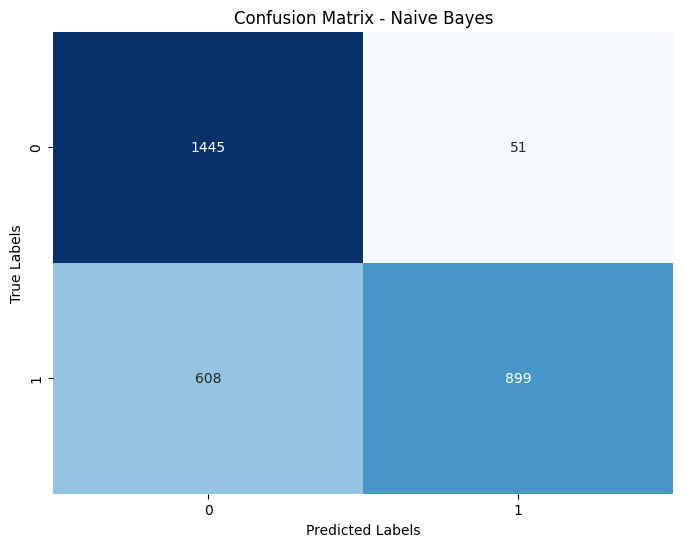


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.97      0.81      1496
         1.0       0.95      0.60      0.73      1507

    accuracy                           0.78      3003
   macro avg       0.83      0.78      0.77      3003
weighted avg       0.83      0.78      0.77      3003



In [110]:
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

naive_bayes_results = {
    "Model": "Naive Bayes",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
results_df = pd.concat([results_df, pd.DataFrame([naive_bayes_results])], ignore_index=True)

# Comparison

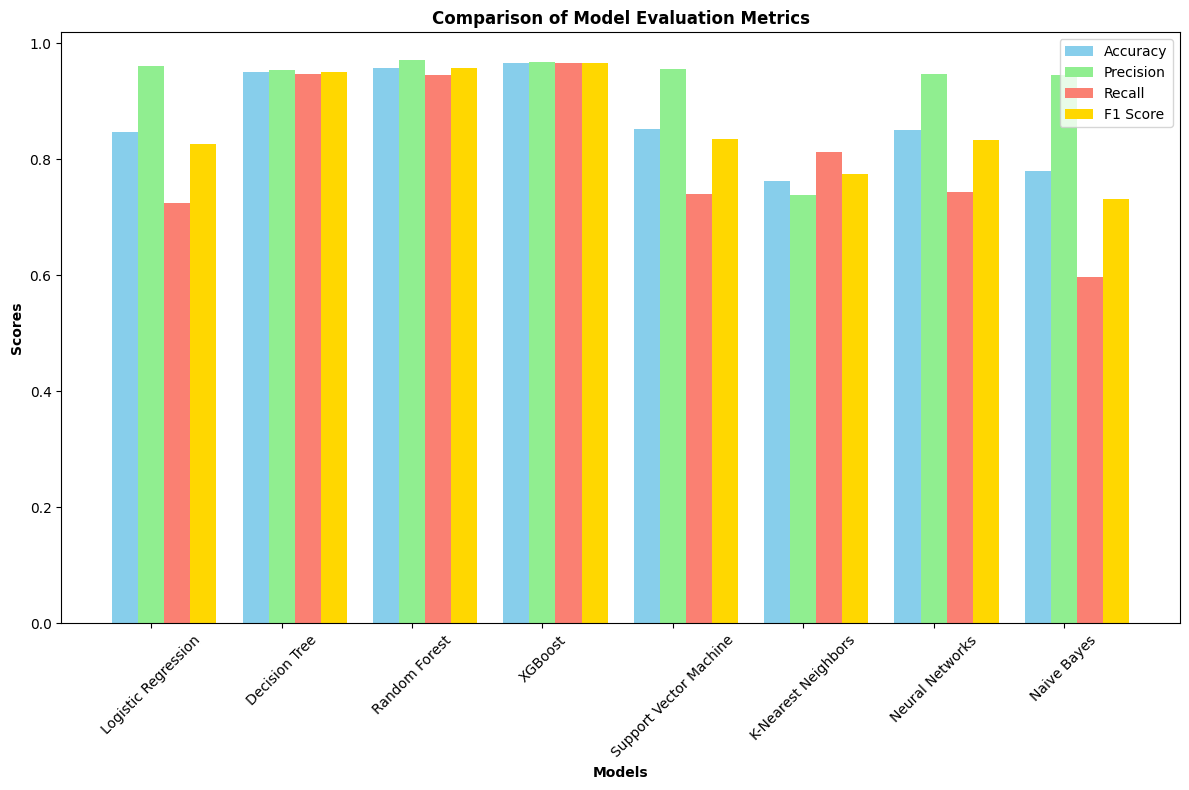

In [119]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define the width of each bar
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(results_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot Accuracy scores
plt.bar(r1, results_df['Accuracy'], color='skyblue', width=bar_width, label='Accuracy')

# Plot Precision scores
plt.bar(r2, results_df['Precision'], color='lightgreen', width=bar_width, label='Precision')

# Plot Recall scores
plt.bar(r3, results_df['Recall'], color='salmon', width=bar_width, label='Recall')

# Plot F1 Score scores
plt.bar(r4, results_df['F1 Score'], color='gold', width=bar_width, label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(results_df))], results_df['Model'], rotation=45)

# Add labels and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Model Evaluation Metrics', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

It can be concluded that **XGBoost model** has the highest accuracy, precision, recall and F1 score. On the other hand, the performance of Logistic Regression model is quite low. All models performed well, but XGBoost emerges as the best performing model.